In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans, MiniBatchKMeans

In [27]:
data = pd.read_csv("merged_data.csv", parse_dates=[0], infer_datetime_format=True)

In [28]:
print data.dtypes
print len(data)

start date       datetime64[ns]
start station            object
terminalname              int64
lat                     float64
long                    float64
dtype: object
11815281


In [29]:
stations = data[['start station', 'terminalname', 'lat', 'long']]

In [30]:
print len(stations), len(stations.drop_duplicates())
print stations.drop_duplicates()

11815281 396
                                              start station  terminalname  \
0                                            17th & K St NW         31213   
18245                          7th & R St NW / Shaw Library         31245   
21159                        Georgia & New Hampshire Ave NW         31400   
23655                                        14th & V St NW         31101   
30397                                   11th & Kenyon St NW         31102   
34406                37th & O St NW / Georgetown University         31236   
36944                                  Lynn & 19th St North         31014   
38755          Tenleytown / Wisconsin Ave & Albemarle St NW         31303   
40539                             New York Ave & 15th St NW         31222   
44491                         Metro Center / 12th & G St NW         31230   
49255                               Lamont & Mt Pleasant NW         31107   
53842                         25th St & Pennsylvania Ave NW    

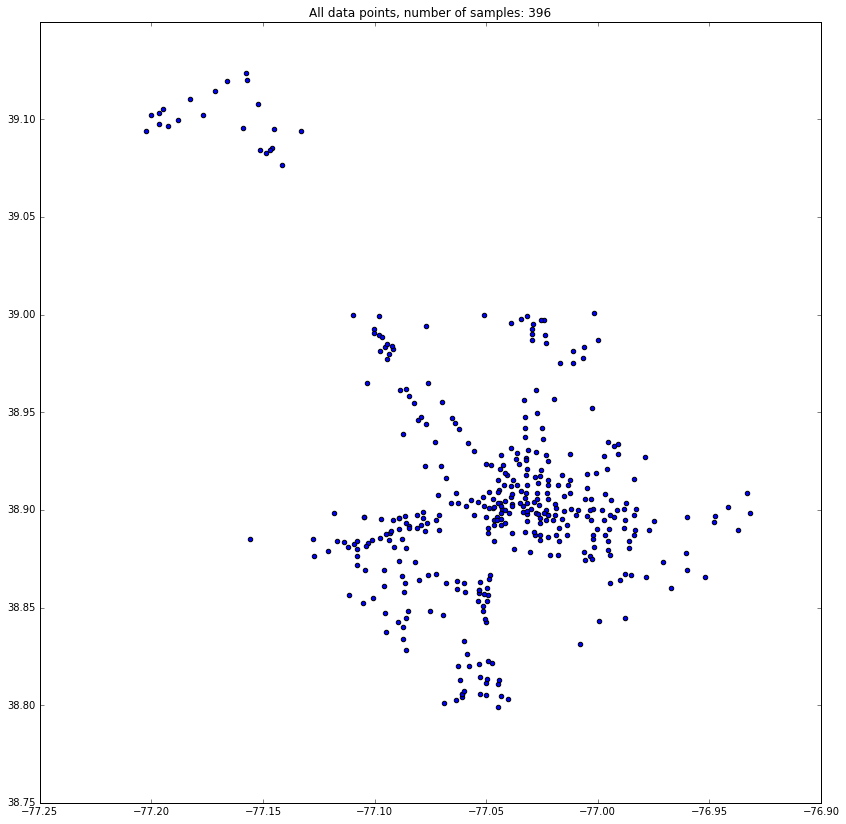

In [31]:
stations_unique = stations.drop_duplicates()
plt.figure(figsize=(14, 14))
plt.title('All data points, number of samples: %d' %len(stations_unique))
plt.scatter(stations_unique['long'], stations_unique.lat)
plt.show()

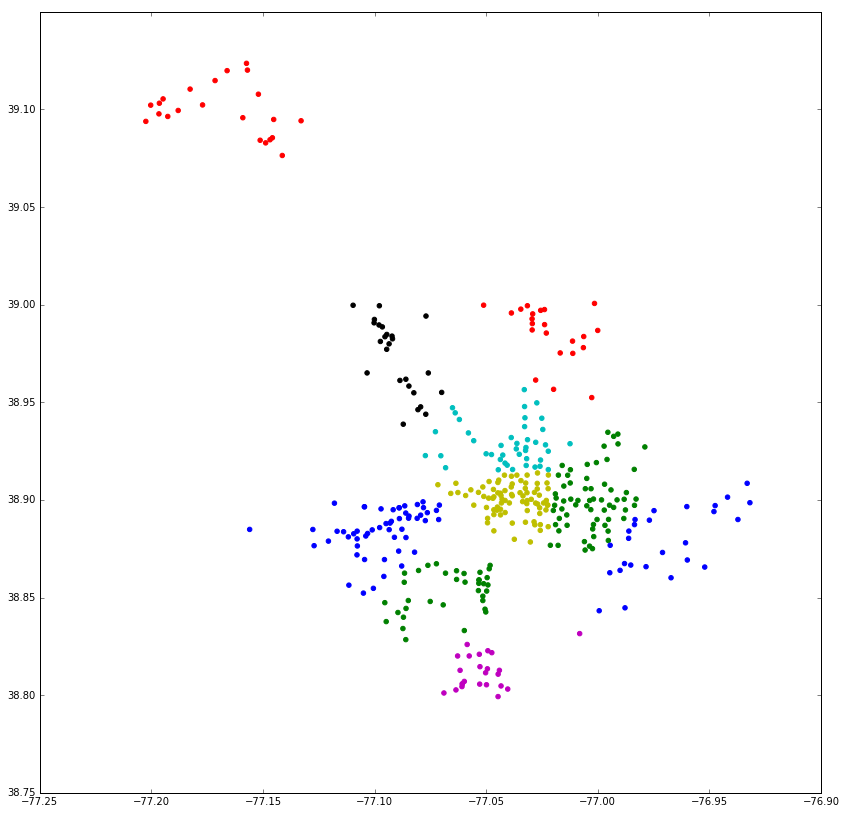

In [51]:
data = stations_unique[['long', 'lat']]
kmeans = KMeans(n_clusters=10)
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
kmeans_label = kmeans.fit_predict(data)
plt.figure(figsize=(14, 14))
plt.scatter(data['long'], data['lat'], color=colors[kmeans_label].tolist())
plt.show()

In [64]:
stations_unique = stations_unique.assign(label = kmeans_label)

In [71]:
print stations_unique[stations_unique['terminalname'] == 31811]
print stations_unique[stations_unique['terminalname'] == 31706]
stations_unique = stations_unique.set_value(11798399, 'label', 7)
print stations_unique[stations_unique['terminalname'] == 31811]
print stations_unique[stations_unique['terminalname'] == 31706]

                           start station  terminalname        lat       long  \
11798399  South Capitol & Atlantic St SW         31811  38.831516 -77.008133   

          label  
11798399      7  
          start station  terminalname       lat       long  label
338872  Fairfax Village         31706  38.86559 -76.952103      7
                           start station  terminalname        lat       long  \
11798399  South Capitol & Atlantic St SW         31811  38.831516 -77.008133   

          label  
11798399      7  
          start station  terminalname       lat       long  label
338872  Fairfax Village         31706  38.86559 -76.952103      7


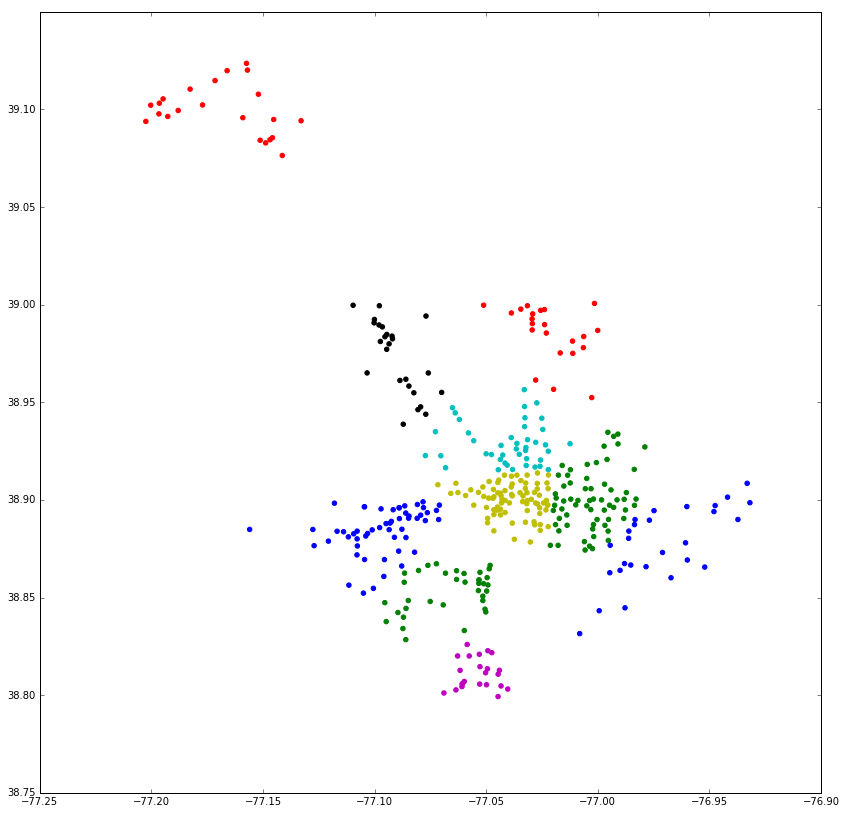

In [72]:
plt.figure(figsize=(14, 14))
plt.scatter(stations_unique['long'], stations_unique['lat'], color=colors[stations_unique['label']].tolist())
plt.show()

In [74]:
alldata = pd.read_csv("merged_data.csv", parse_dates=[0], infer_datetime_format=True)

In [81]:
stations_unique.to_csv("station_with_label.csv", index=False)

In [76]:
print alldata.shape
useful_for_merge = stations_unique[['terminalname', 'label']]
print useful_for_merge.head()

(11815281, 5)
       terminalname  label
0             31213      5
18245         31245      5
21159         31400      3
23655         31101      3
30397         31102      3


In [78]:
print alldata.dtypes
print len(alldata)
merged = alldata.merge(useful_for_merge, on='terminalname', how='inner')
print merged.dtypes, merged.shape

start date       datetime64[ns]
start station            object
terminalname              int64
lat                     float64
long                    float64
dtype: object
11815281
start date       datetime64[ns]
start station            object
terminalname              int64
lat                     float64
long                    float64
label                     int32
dtype: object (11931060, 6)


In [79]:
print merged.head()

           start date   start station  terminalname       lat      long  label
0 2010-12-31 20:02:00  17th & K St NW         31213  38.90276 -77.03863      5
1 2010-12-31 17:37:00  17th & K St NW         31213  38.90276 -77.03863      5
2 2010-12-31 13:54:00  17th & K St NW         31213  38.90276 -77.03863      5
3 2010-12-31 11:49:00  17th & K St NW         31213  38.90276 -77.03863      5
4 2010-12-31 11:50:00  17th & K St NW         31213  38.90276 -77.03863      5


In [80]:
picked = merged[['start date', 'terminalname', 'label']]
print picked.head()

           start date  terminalname  label
0 2010-12-31 20:02:00         31213      5
1 2010-12-31 17:37:00         31213      5
2 2010-12-31 13:54:00         31213      5
3 2010-12-31 11:49:00         31213      5
4 2010-12-31 11:50:00         31213      5


In [92]:
date_string = picked['start date'].apply(lambda x: x.strftime("%m/%d/%Y %H"))

In [93]:
print date_string.head()

0    12/31/2010 20
1    12/31/2010 17
2    12/31/2010 13
3    12/31/2010 11
4    12/31/2010 11
Name: start date, dtype: object


In [82]:
picked.to_csv("data_with_label.csv", index=False, date_format ="%m/%d/%Y %H")

In [94]:
to_be_agg = picked.assign(date = date_string)

In [96]:
print to_be_agg.head()
to_be_agg_small = to_be_agg[['label', 'date']]
print to_be_agg_small.head()

           start date  terminalname  label           date
0 2010-12-31 20:02:00         31213      5  12/31/2010 20
1 2010-12-31 17:37:00         31213      5  12/31/2010 17
2 2010-12-31 13:54:00         31213      5  12/31/2010 13
3 2010-12-31 11:49:00         31213      5  12/31/2010 11
4 2010-12-31 11:50:00         31213      5  12/31/2010 11
   label           date
0      5  12/31/2010 20
1      5  12/31/2010 17
2      5  12/31/2010 13
3      5  12/31/2010 11
4      5  12/31/2010 11


In [104]:
group_by_date_label = to_be_agg_small.groupby(['date', 'label']).size()

In [106]:
new_group_by_date_label = pd.DataFrame({'count' : to_be_agg_small.groupby(['date', 'label']).size()}).reset_index()

In [107]:
print new_group_by_date_label

                 date  label  count
0       01/01/2011 01      5      1
1       01/01/2011 13      5      4
2       01/01/2011 14      5      1
3       01/01/2011 15      5      2
4       01/01/2011 16      5      2
5       01/01/2011 19      5      1
6       01/01/2012 00      0      1
7       01/01/2012 00      1      2
8       01/01/2012 00      3     15
9       01/01/2012 00      5     19
10      01/01/2012 00      6      1
11      01/01/2012 00      7      5
12      01/01/2012 00      8      2
13      01/01/2012 01      0      1
14      01/01/2012 01      1     14
15      01/01/2012 01      3     39
16      01/01/2012 01      5     33
17      01/01/2012 01      8      2
18      01/01/2012 02      0      1
19      01/01/2012 02      1     17
20      01/01/2012 02      3     27
21      01/01/2012 02      5     23
22      01/01/2012 02      7      1
23      01/01/2012 02      8      1
24      01/01/2012 03      1     10
25      01/01/2012 03      3     29
26      01/01/2012 03      5

In [87]:
weather = pd.read_csv("weather.csv", parse_dates=[0], infer_datetime_format=True)

In [91]:
print weather.dtypes
print weather.head()
test_datetime = weather.iloc[0]['Start date']
test = test_datetime.strftime("%m/%d/%Y %H")
print test, type(test)

Start date      datetime64[ns]
Weather type             int64
Temperature            float64
Humidity               float64
Wind speed             float64
dtype: object
           Start date  Weather type  Temperature  Humidity  Wind speed
0 2011-03-31 23:00:00             9          5.0      0.96        14.8
1 2011-03-31 22:00:00             4          5.0      0.93        11.1
2 2011-03-31 21:00:00             9          5.0      0.93        14.8
3 2011-03-31 20:00:00             4          6.0      0.87        14.8
4 2011-03-31 19:00:00             4          6.0      0.87         9.3
03/31/2011 23 <type 'str'>


In [108]:
weather_date_string = weather['Start date'].apply(lambda x: x.strftime("%m/%d/%Y %H"))

In [109]:
weather_with_string = weather.assign(date = weather_date_string)

In [110]:
print weather_with_string

               Start date  Weather type  Temperature  Humidity  Wind speed  \
0     2011-03-31 23:00:00             9          5.0      0.96        14.8   
1     2011-03-31 22:00:00             4          5.0      0.93        11.1   
2     2011-03-31 21:00:00             9          5.0      0.93        14.8   
3     2011-03-31 20:00:00             4          6.0      0.87        14.8   
4     2011-03-31 19:00:00             4          6.0      0.87         9.3   
5     2011-03-31 18:00:00             4          5.6      0.92        14.8   
6     2011-03-31 17:00:00             4          5.6      0.89        11.1   
7     2011-03-31 16:00:00             9          6.0      0.87        20.4   
8     2011-03-31 15:00:00             9          6.0      0.87        14.8   
9     2011-03-31 14:00:00             9          6.0      0.87         9.3   
10    2011-03-31 13:00:00             9          5.0      0.93         7.4   
11    2011-03-31 12:00:00             9          5.0      0.93  

In [111]:
weather_to_be_merged = weather_with_string[["date","Weather type", "Temperature", "Humidity" ,"Wind speed"]]
print weather_to_be_merged

                date  Weather type  Temperature  Humidity  Wind speed
0      03/31/2011 23             9          5.0      0.96        14.8
1      03/31/2011 22             4          5.0      0.93        11.1
2      03/31/2011 21             9          5.0      0.93        14.8
3      03/31/2011 20             4          6.0      0.87        14.8
4      03/31/2011 19             4          6.0      0.87         9.3
5      03/31/2011 18             4          5.6      0.92        14.8
6      03/31/2011 17             4          5.6      0.89        11.1
7      03/31/2011 16             9          6.0      0.87        20.4
8      03/31/2011 15             9          6.0      0.87        14.8
9      03/31/2011 14             9          6.0      0.87         9.3
10     03/31/2011 13             9          5.0      0.93         7.4
11     03/31/2011 12             9          5.0      0.93        13.0
12     03/31/2011 11             9          5.0      0.93        14.8
13     03/31/2011 10

In [112]:
final_merged = new_group_by_date_label.merge(weather_to_be_merged, on = 'date', how='inner')

In [113]:
print final_merged

                 date  label  count  Weather type  Temperature  Humidity  \
0       01/01/2011 01      5      1             2          2.2      0.82   
1       01/01/2011 13      5      4             4         14.0      0.77   
2       01/01/2011 14      5      1             4         12.8      0.77   
3       01/01/2011 15      5      2             4         11.7      0.83   
4       01/01/2011 16      5      2             4         12.0      0.82   
5       01/01/2011 19      5      1             4         10.0      0.94   
6       01/01/2012 00      0      1             1          6.7      0.76   
7       01/01/2012 00      1      2             1          6.7      0.76   
8       01/01/2012 00      3     15             1          6.7      0.76   
9       01/01/2012 00      5     19             1          6.7      0.76   
10      01/01/2012 00      6      1             1          6.7      0.76   
11      01/01/2012 00      7      5             1          6.7      0.76   
12      01/0

In [114]:
final_merged.to_csv("data_with_label_and_weather.csv", index=False)